In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Convert to DataFrame
df = pd.read_csv('portfolio_data.csv')
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [ ]:
df.head(5)

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285


In [ ]:
df["AMZN_MA"] = df["AMZN"].rolling(window=3).mean()
df["DPZ_MA"] = df["DPZ"].rolling(window=3).mean()
df["BTC_MA"] = df["BTC"].rolling(window=3).mean()
df["NFLX_MA"] = df["NFLX"].rolling(window=3).mean()


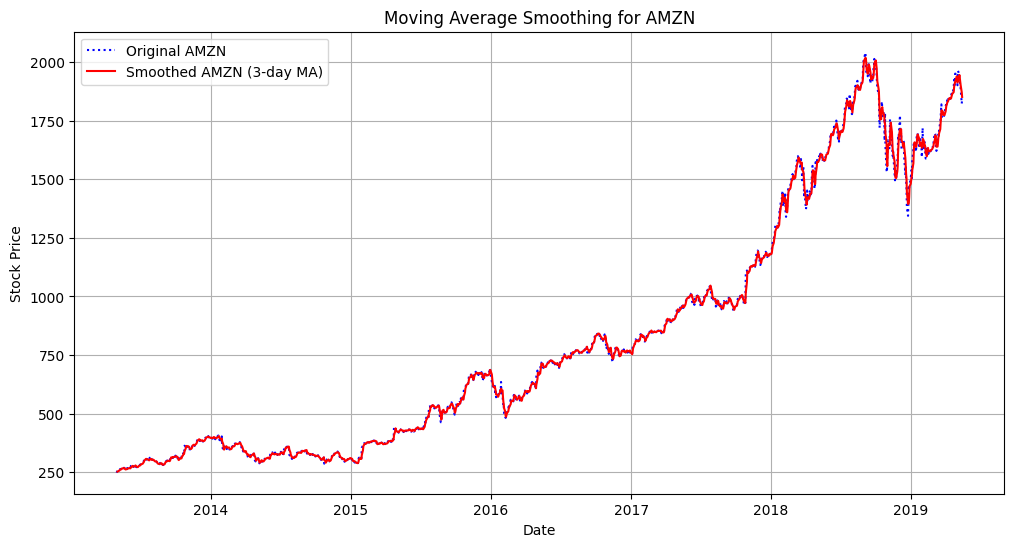

                   AMZN         DPZ          BTC        NFLX      AMZN_MA  \
Date                                                                        
2013-05-01   248.229996   51.190983   106.250000   30.415714          NaN   
2013-05-02   252.550003   51.987320    98.099998   30.641428          NaN   
2013-05-03   258.049988   52.446388   112.900002   30.492857   252.943329   
2013-05-06   255.720001   53.205257   109.599998   30.098572   255.439997   
2013-05-07   257.730011   54.151505   113.199997   29.464285   257.166667   
...                 ...         ...          ...         ...          ...   
2019-05-08  1917.770020  283.149994  6171.959961  364.369995  1929.773356   
2019-05-09  1899.869995  282.160004  6358.290039  362.750000  1912.880005   
2019-05-10  1889.979980  278.369995  7191.359863  361.040009  1902.539998   
2019-05-13  1822.680054  273.880005  7980.129883  345.260010  1870.843343   
2019-05-14  1840.119995  272.859985  8183.830078  345.609985  1850.926676   

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df.index, df["AMZN"], label="Original AMZN", color="blue", linestyle="dotted")
plt.plot(df.index, df["AMZN_MA"], label="Smoothed AMZN (3-day MA)", color="red")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Moving Average Smoothing for AMZN")
plt.legend()
plt.grid()
plt.show()

# Display the smoothed data
print(df)

In [ ]:
# prompt: print the original data and the smoothened data

# Print original and smoothed data for AMZN
print("Original AMZN Data:")
print(df["AMZN"])
print("\nSmoothed AMZN Data (3-day MA):")
print(df["AMZN_MA"])


Original AMZN Data:
Date
2013-05-01     248.229996
2013-05-02     252.550003
2013-05-03     258.049988
2013-05-06     255.720001
2013-05-07     257.730011
                 ...     
2019-05-08    1917.770020
2019-05-09    1899.869995
2019-05-10    1889.979980
2019-05-13    1822.680054
2019-05-14    1840.119995
Name: AMZN, Length: 1520, dtype: float64

Smoothed AMZN Data (3-day MA):
Date
2013-05-01            NaN
2013-05-02            NaN
2013-05-03     252.943329
2013-05-06     255.439997
2013-05-07     257.166667
                 ...     
2019-05-08    1929.773356
2019-05-09    1912.880005
2019-05-10    1902.539998
2019-05-13    1870.843343
2019-05-14    1850.926676
Name: AMZN_MA, Length: 1520, dtype: float64


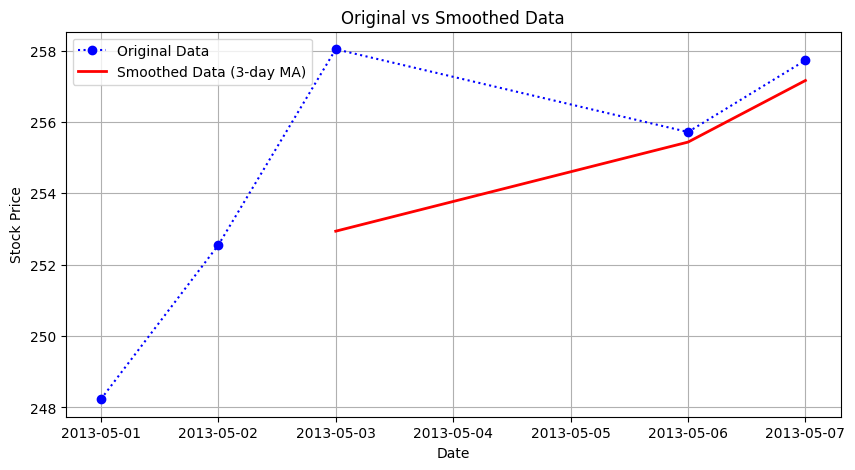

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample stock data
data = {
    "Date": ["2013-05-01", "2013-05-02", "2013-05-03", "2013-05-06", "2013-05-07"],
    "AMZN": [248.23, 252.55, 258.04, 255.72, 257.73]
}
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Apply Moving Average (3-day)
df["AMZN_MA"] = df["AMZN"].rolling(window=3).mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(df.index, df["AMZN"], label="Original Data", color="blue", linestyle="dotted", marker="o")
plt.plot(df.index, df["AMZN_MA"], label="Smoothed Data (3-day MA)", color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Original vs Smoothed Data")
plt.legend()
plt.grid()
plt.show()
